In [279]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,KBinsDiscretizer
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [280]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [130]:
application_df['ASK_AMT'] = application_df.apply(lambda x: '5000' if x['ASK_AMT'] == 5000 else 'other', axis=1)
application_df['ASK_AMT'].value_counts()

5000     25398
other     8901
Name: ASK_AMT, dtype: int64

In [281]:
# Get counts of type column
type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Determine which values to replace if counts are less than 500
replace_application = list(type_counts[type_counts < 750].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [282]:
# Get counts of class column
class_counts = application_df['CLASSIFICATION'].value_counts()

# Determine which values to replace if counts are less than 500
replace_class = list(class_counts[class_counts < 1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [283]:
# Map income category to ordinal values
income_dict = {'0': 0,
               '1-9999': 1,
               '10000-24999': 2,
               '25000-99999': 3,
               '100000-499999': 4,
               '1M-5M': 5,
               '5M-10M': 6,
               '10M-50M': 7,
               '50M+': 8}

application_df['INCOME_AMT'] = application_df['INCOME_AMT'].map(income_dict)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,2,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,4,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [284]:
# Generate our categorical variable lists
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'SPECIAL_CONSIDERATIONS',]
                   #'ASK_AMT']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [270]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat)
merged_df.head()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [285]:
# Remove outliers from the dataset
iqr = merged_df['ASK_AMT'].quantile(0.75) - merged_df['ASK_AMT'].quantile(0.25)

merged_df = merged_df[merged_df['ASK_AMT'] < (iqr*3 + merged_df['ASK_AMT'].quantile(0.75))]
merged_df

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,0,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1,0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,1,0,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34294,1,0,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,1,0,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,1,0,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [251]:
iqr = merged_df['ASK_AMT'].quantile(0.75) - merged_df['ASK_AMT'].quantile(0.25)

upper_fence = iqr*3 + merged_df['ASK_AMT'].quantile(0.75)

In [252]:
merged_df['ASK_AMT'] = merged_df.apply(lambda x: x['ASK_AMT'] if x['ASK_AMT'] < upper_fence else upper_fence, axis=1)

In [286]:
# Split our preprocessed data into our features and target arrays
y = merged_df['IS_SUCCESSFUL']
X = merged_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [287]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the checkpoint path and filenames
os.makedirs("../tuning/",exist_ok=True)
checkpoint_path = "../checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Create a callback for early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [294]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Use ReLU for activation
    #activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=50,
        max_value=150,
        step=20), activation='relu', input_dim=32))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 2, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=25,
            max_value=125,
            step=10),
            activation='relu'))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [295]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=10,
    hyperband_iterations=2,
    overwrite=True,
    directory='./hypermodel')

In [296]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled,y_test), callbacks=[cp_callback, stop_early])

Trial 60 Complete [00h 00m 23s]
val_accuracy: 0.74617600440979

Best val_accuracy So Far: 0.74617600440979
Total elapsed time: 00h 13m 05s
INFO:tensorflow:Oracle triggered exit


In [297]:
# Get the best set of hyperparameters
hps = tuner.get_best_hyperparameters()[0]
hps.values

{'first_units': 70,
 'num_layers': 3,
 'units_0': 25,
 'units_1': 115,
 'units_2': 85,
 'units_3': 105,
 'units_4': 45,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [299]:
model = tuner.hypermodel.build(hps)
history = model.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback, stop_early])

Epoch 1/100
615/619 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.7364
Epoch 1: saving model to ../checkpoints\weights.01.hdf5
619/619 [==============================] - 3s 3ms/step - loss: 0.5581 - accuracy: 0.7360
Epoch 2/100
617/619 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7478
Epoch 2: saving model to ../checkpoints\weights.02.hdf5
619/619 [==============================] - 2s 3ms/step - loss: 0.5404 - accuracy: 0.7476
Epoch 3/100
608/619 [============================>.] - ETA: 0s - loss: 0.5378 - accuracy: 0.7484
Epoch 3: saving model to ../checkpoints\weights.03.hdf5
619/619 [==============================] - 2s 3ms/step - loss: 0.5377 - accuracy: 0.7485
Epoch 4/100
619/619 [==============================] - ETA: 0s - loss: 0.5357 - accuracy: 0.7488
Epoch 4: saving model to ../checkpoints\weights.04.hdf5
619/619 [==============================] - 2s 3ms/step - loss: 0.5357 - accuracy: 0.7488
Epoch 5/100
612/619 [===========

In [230]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: in user code:

    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\zach1\Coding\env\mlenv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 37), found shape=(None, 36)


In [258]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
neurons_1 = 80
neurons_2 = 30
activation = 'relu'

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=neurons_1, input_dim=input_features, activation=activation))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=neurons_2, activation=activation))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 80)                8640      
                                                                 
 dense_38 (Dense)            (None, 30)                2430      
                                                                 
 dense_39 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [259]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, callbacks=[stop_early])

Epoch 1/200
804/804 [==============================] - 3s 2ms/step - loss: 0.5733 - accuracy: 0.7194
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7313
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5511 - accuracy: 0.7314
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7303
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5463 - accuracy: 0.7330
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7309
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7326
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7326
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7330
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5424 - accura

In [261]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5652 - accuracy: 0.7298 - 576ms/epoch - 2ms/step
Loss: 0.5651616454124451, Accuracy: 0.7297959327697754


In [61]:
application_df['ASK_AMT'].plot()

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'

<AxesSubplot:xlabel='ASK_AMT', ylabel='INCOME_AMT'>

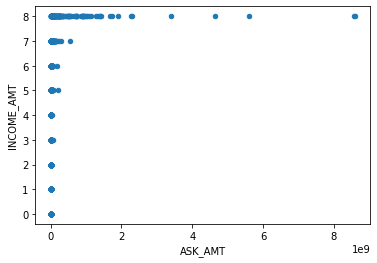

In [236]:
application_df.plot.scatter('ASK_AMT', 'INCOME_AMT')

<AxesSubplot:>

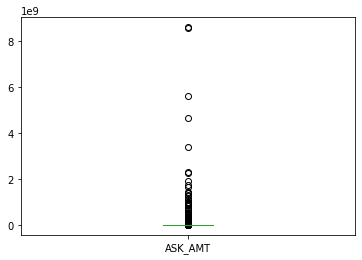

In [66]:
application_df.plot.box(column='ASK_AMT')

<AxesSubplot:ylabel='Frequency'>

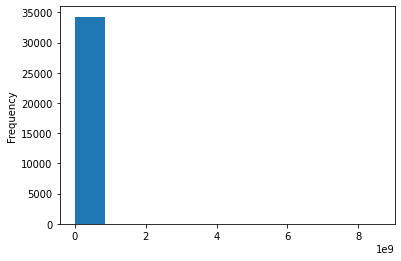

In [68]:
application_df['ASK_AMT'].plot.hist()

In [73]:
iqr = application_df['ASK_AMT'].quantile(0.75) - application_df['ASK_AMT'].quantile(0.25)

In [75]:
application_df.describe()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,34299.000000,3.429900e+04,34299.000000
mean,0.999854,1.027085,2.769199e+06,0.532406
std,0.012073,1.754810,8.713045e+07,0.498956
min,0.000000,0.000000,5.000000e+03,0.000000
25%,1.000000,0.000000,5.000000e+03,0.000000
50%,1.000000,0.000000,5.000000e+03,1.000000
75%,1.000000,3.000000,7.742000e+03,1.000000
max,1.000000,8.000000,8.597806e+09,1.000000


In [85]:
no_outlier_df = application_df[application_df['ASK_AMT'] < (iqr*3 + application_df['ASK_AMT'].quantile(0.75))]
no_outlier_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,2,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [86]:
no_outlier_df.describe()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
count,26409.000000,26409.000000,26409.000000,26409.000000
mean,0.999811,0.201219,5188.190125,0.527661
std,0.013759,0.757541,1137.007770,0.499244
min,0.000000,0.000000,5000.000000,0.000000
25%,1.000000,0.000000,5000.000000,0.000000
50%,1.000000,0.000000,5000.000000,1.000000
75%,1.000000,0.000000,5000.000000,1.000000
max,1.000000,8.000000,15964.000000,1.000000


<AxesSubplot:xlabel='ASK_AMT', ylabel='INCOME_AMT'>

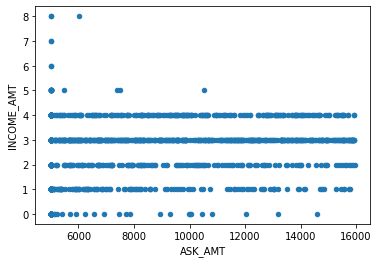

In [87]:
no_outlier_df.plot.scatter('ASK_AMT', 'INCOME_AMT')

<AxesSubplot:ylabel='Frequency'>

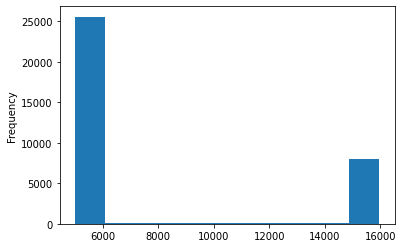

In [223]:
merged_df['ASK_AMT'].plot.hist()

In [224]:
merged_df['ASK_AMT'].value_counts()

5000.0     25398
15968.0     7890
10478.0        3
15583.0        3
6725.0         3
           ...  
13163.0        1
8324.0         1
15704.0        1
7520.0         1
6713.0         1
Name: ASK_AMT, Length: 958, dtype: int64

In [96]:
merged_df.shape

(26409, 33)

In [162]:
from sklearn.feature_selection import chi2, SelectKBest

In [181]:
X_selected = SelectKBest(chi2, k=5).fit_transform(X, y)

In [182]:
X_selected.shape

(34299, 5)

In [168]:
X.shape

(34299, 37)

In [183]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y)

# Create a StandardScaler instances
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [176]:
fit_model.history

{'loss': [0.5710426568984985,
  0.5565198063850403,
  0.5537310838699341,
  0.5529825687408447,
  0.5522255301475525,
  0.551392138004303,
  0.5512043237686157,
  0.5510813593864441,
  0.5502942800521851,
  0.5494089126586914,
  0.5497541427612305,
  0.5492773056030273,
  0.5491126775741577,
  0.5487810373306274,
  0.548599898815155,
  0.5482932925224304,
  0.5481632947921753,
  0.5480995178222656,
  0.5478292107582092,
  0.5476098656654358,
  0.5475446581840515,
  0.5471535921096802,
  0.5469152331352234,
  0.5470685958862305,
  0.5469174981117249,
  0.5466446876525879,
  0.5463685989379883,
  0.5467150211334229,
  0.5461243391036987,
  0.5461834073066711,
  0.5458683967590332,
  0.5461455583572388,
  0.5458959341049194,
  0.5456309914588928,
  0.5457819104194641,
  0.545641303062439,
  0.5454626083374023,
  0.5455397367477417,
  0.5451637506484985,
  0.5455188155174255,
  0.5449835062026978,
  0.5450596809387207,
  0.5451703667640686,
  0.5448976159095764,
  0.5452166199684143,
  0.5